# Content Strategy para creadores de contenido premium: una aproximación desde la simulación

Cómo catapultar tu negocio como Content Creator


In [1]:
import pandas as pd

df = pd.read_json('./data/orders-dataset.json')

In [2]:
df.describe()

,IA
count,4808.000000
mean,31.291181
std,43.201783
min,0.000000
25%,5.000000
50%,15.000000
75%,40.000000
max,347.000000


## Calculo de FDP para el Intervalo entre Arribos

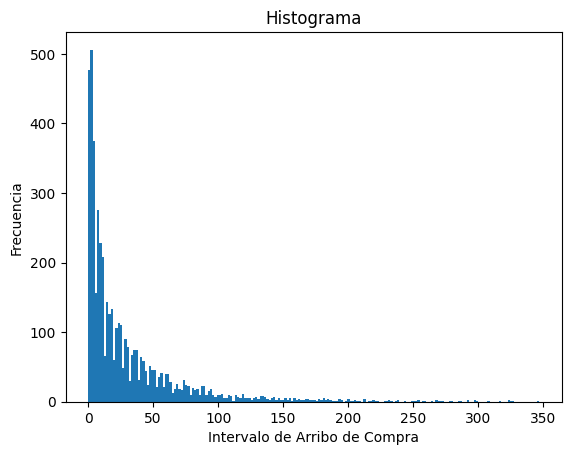

In [3]:
from matplotlib import pyplot as plt

# Histograma de HORAS
plt.title("Histograma")
plt.xlabel("Intervalo de Arribo de Compra")
plt.ylabel("Frecuencia")
plt.hist(df.IA, bins=200)
plt.show()

In [4]:
from fitter import Fitter

f = Fitter(df.IA)
f.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
weibull_min,0.000071,1613.073908,1632.508018,inf,0.071690,6.212552e-22
powerlognorm,0.000078,1547.962095,1573.874241,inf,0.043597,2.227872e-08
halfgennorm,0.000080,1546.133543,1565.567653,inf,0.042637,4.942374e-08
johnsonsb,0.000097,1535.306476,1561.218622,inf,0.035422,1.121220e-05
fatiguelife,0.000102,1565.514907,1584.949017,inf,0.035282,1.233428e-05


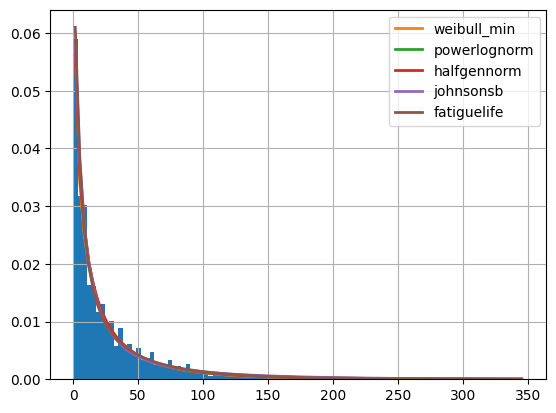

In [5]:
f.summary()

In [6]:
f.get_best(method='sumsquare_error')

{'weibull_min': {'c': 0.6992732706985292,
  'loc': -1.5616001872649825e-27,
  'scale': 21.92617425196091}}

### Verificacion

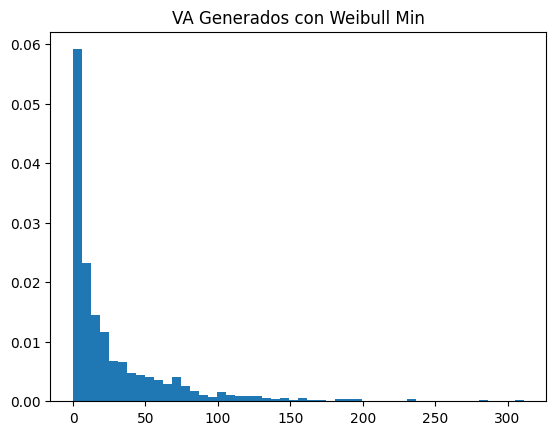

In [8]:
from scipy import stats

best_weibull_min_params = f.get_best(method='sumsquare_error').get("weibull_min")
gen_ia = stats.weibull_min.rvs(**best_weibull_min_params, size=1000, random_state=None)
import matplotlib.pyplot as plt

plt.hist(gen_ia, bins=50, density=True)
plt.title("VA Generados con Weibull Min")
plt.show()